In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

tweets = pd.read_csv("/Users/harshjhunjhunwala/Desktop/github_datasets/charlottesville-on-twitter/aug15_sample.csv")

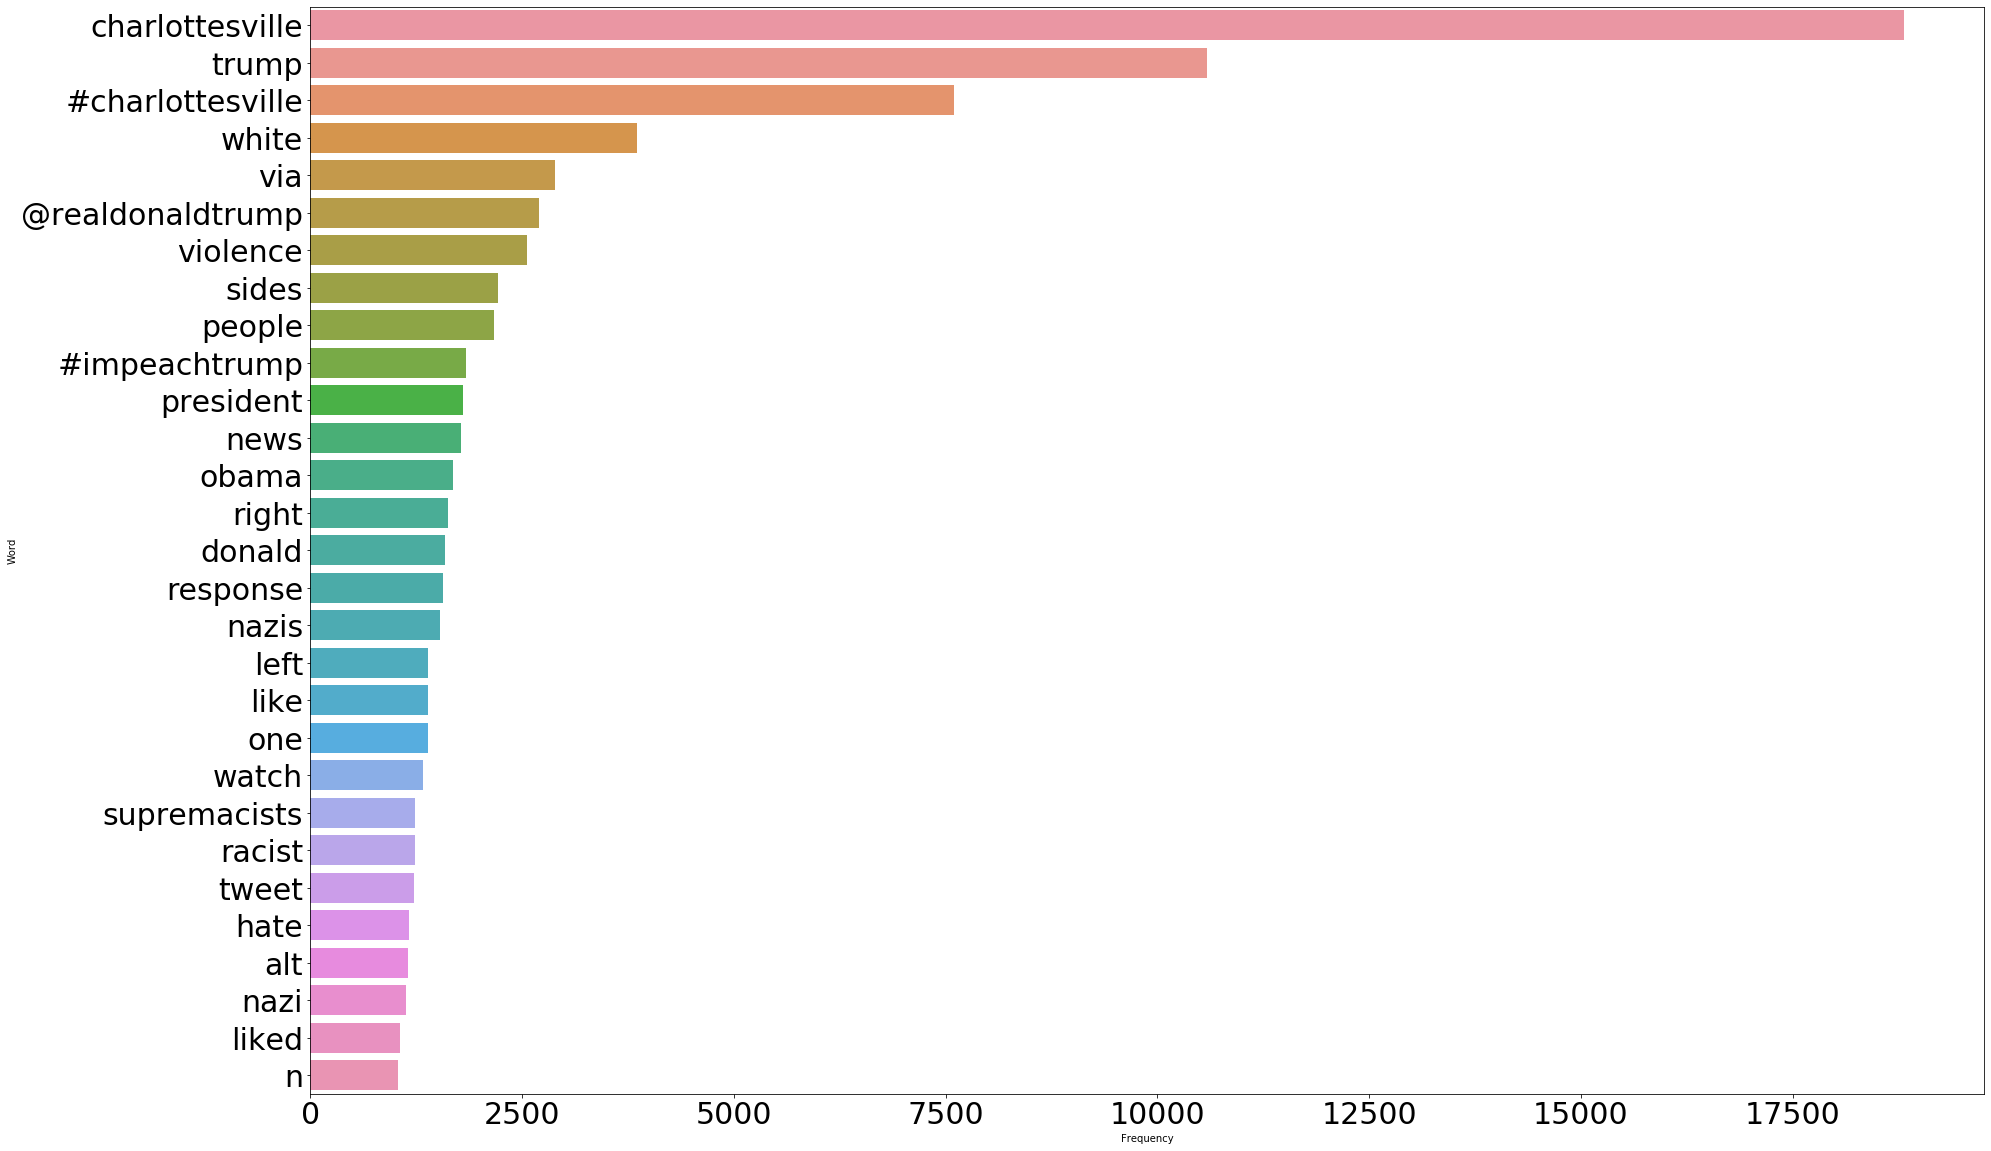

In [2]:
top_N = 30
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (tweets['full_text']
           .str.lower()
           .replace([r'\|', RE_stopwords, r"(&amp)|,|;|\"|\.|\?|’|!|'|:|-|\\|/|https"], [' ', ' ', ' '], regex=True)
           .str.cat(sep=' ')
           .split()
)
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

rslt = rslt.iloc[1:]

plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt.index, x="Frequency", data=rslt)
ax.tick_params(labelsize=30)

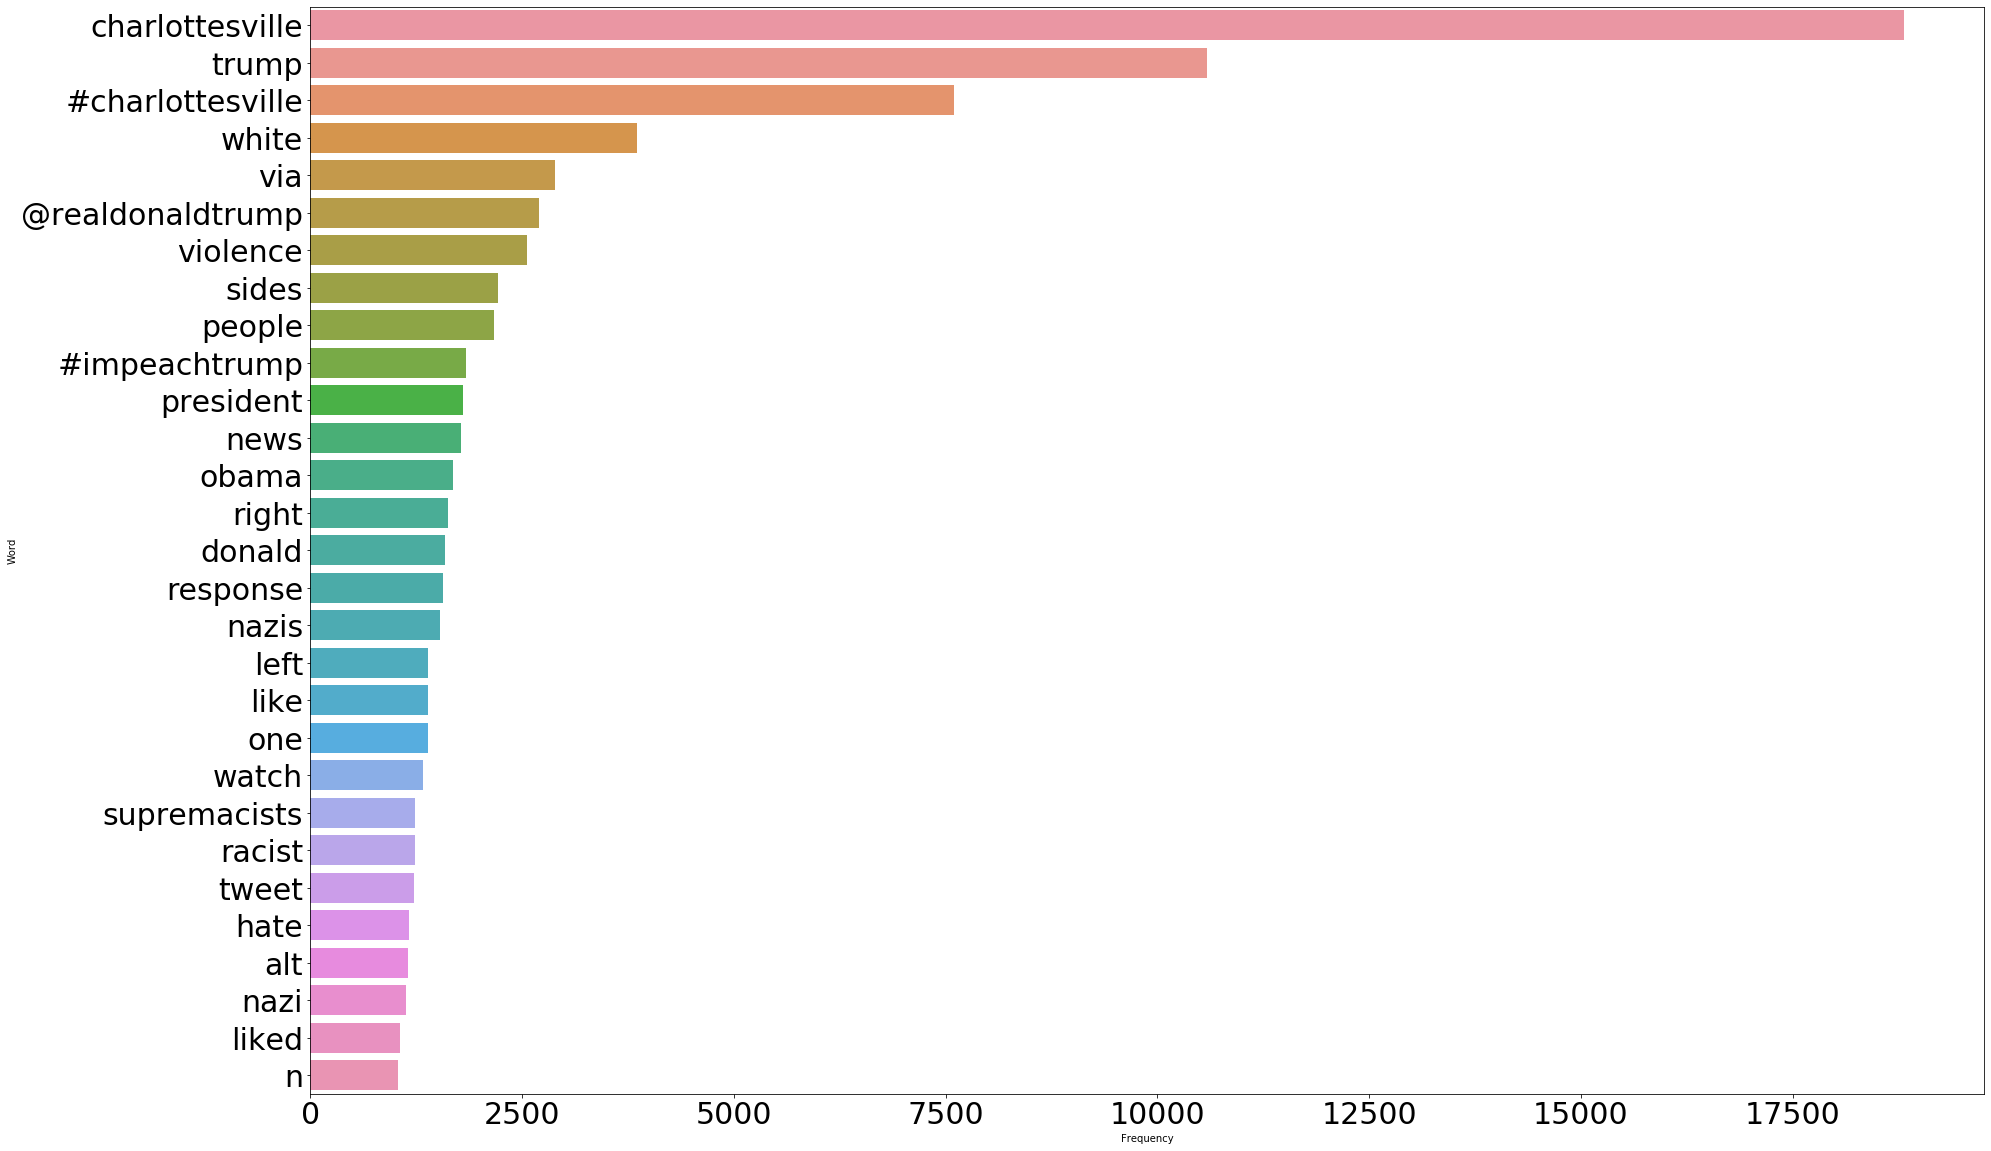

In [3]:
tags = tweets['hashtags'].str.lower().str.cat(sep=' ').split()
hashtags = pd.DataFrame(Counter(tags).most_common(top_N), columns=['Hashtags', 'Frequency']).set_index('Hashtags')
hashtags = hashtags.iloc[1:]

plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt.index, x="Frequency", data=rslt)
ax.tick_params(labelsize=30)

In [8]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets = tweets.set_index('created_at')
tweets

KeyError: 'created_at'

In [19]:
df = tweets[['id']]
tweet_volume = df.resample('10min').count()
tweet_volume

,id
created_at,
2017-08-16 01:00:00,533
2017-08-16 01:10:00,2141
2017-08-16 01:20:00,3369
2017-08-16 01:30:00,3400
2017-08-16 01:40:00,3356
2017-08-16 01:50:00,3292
2017-08-16 02:00:00,3329
2017-08-16 02:10:00,3063
2017-08-16 02:20:00,3181


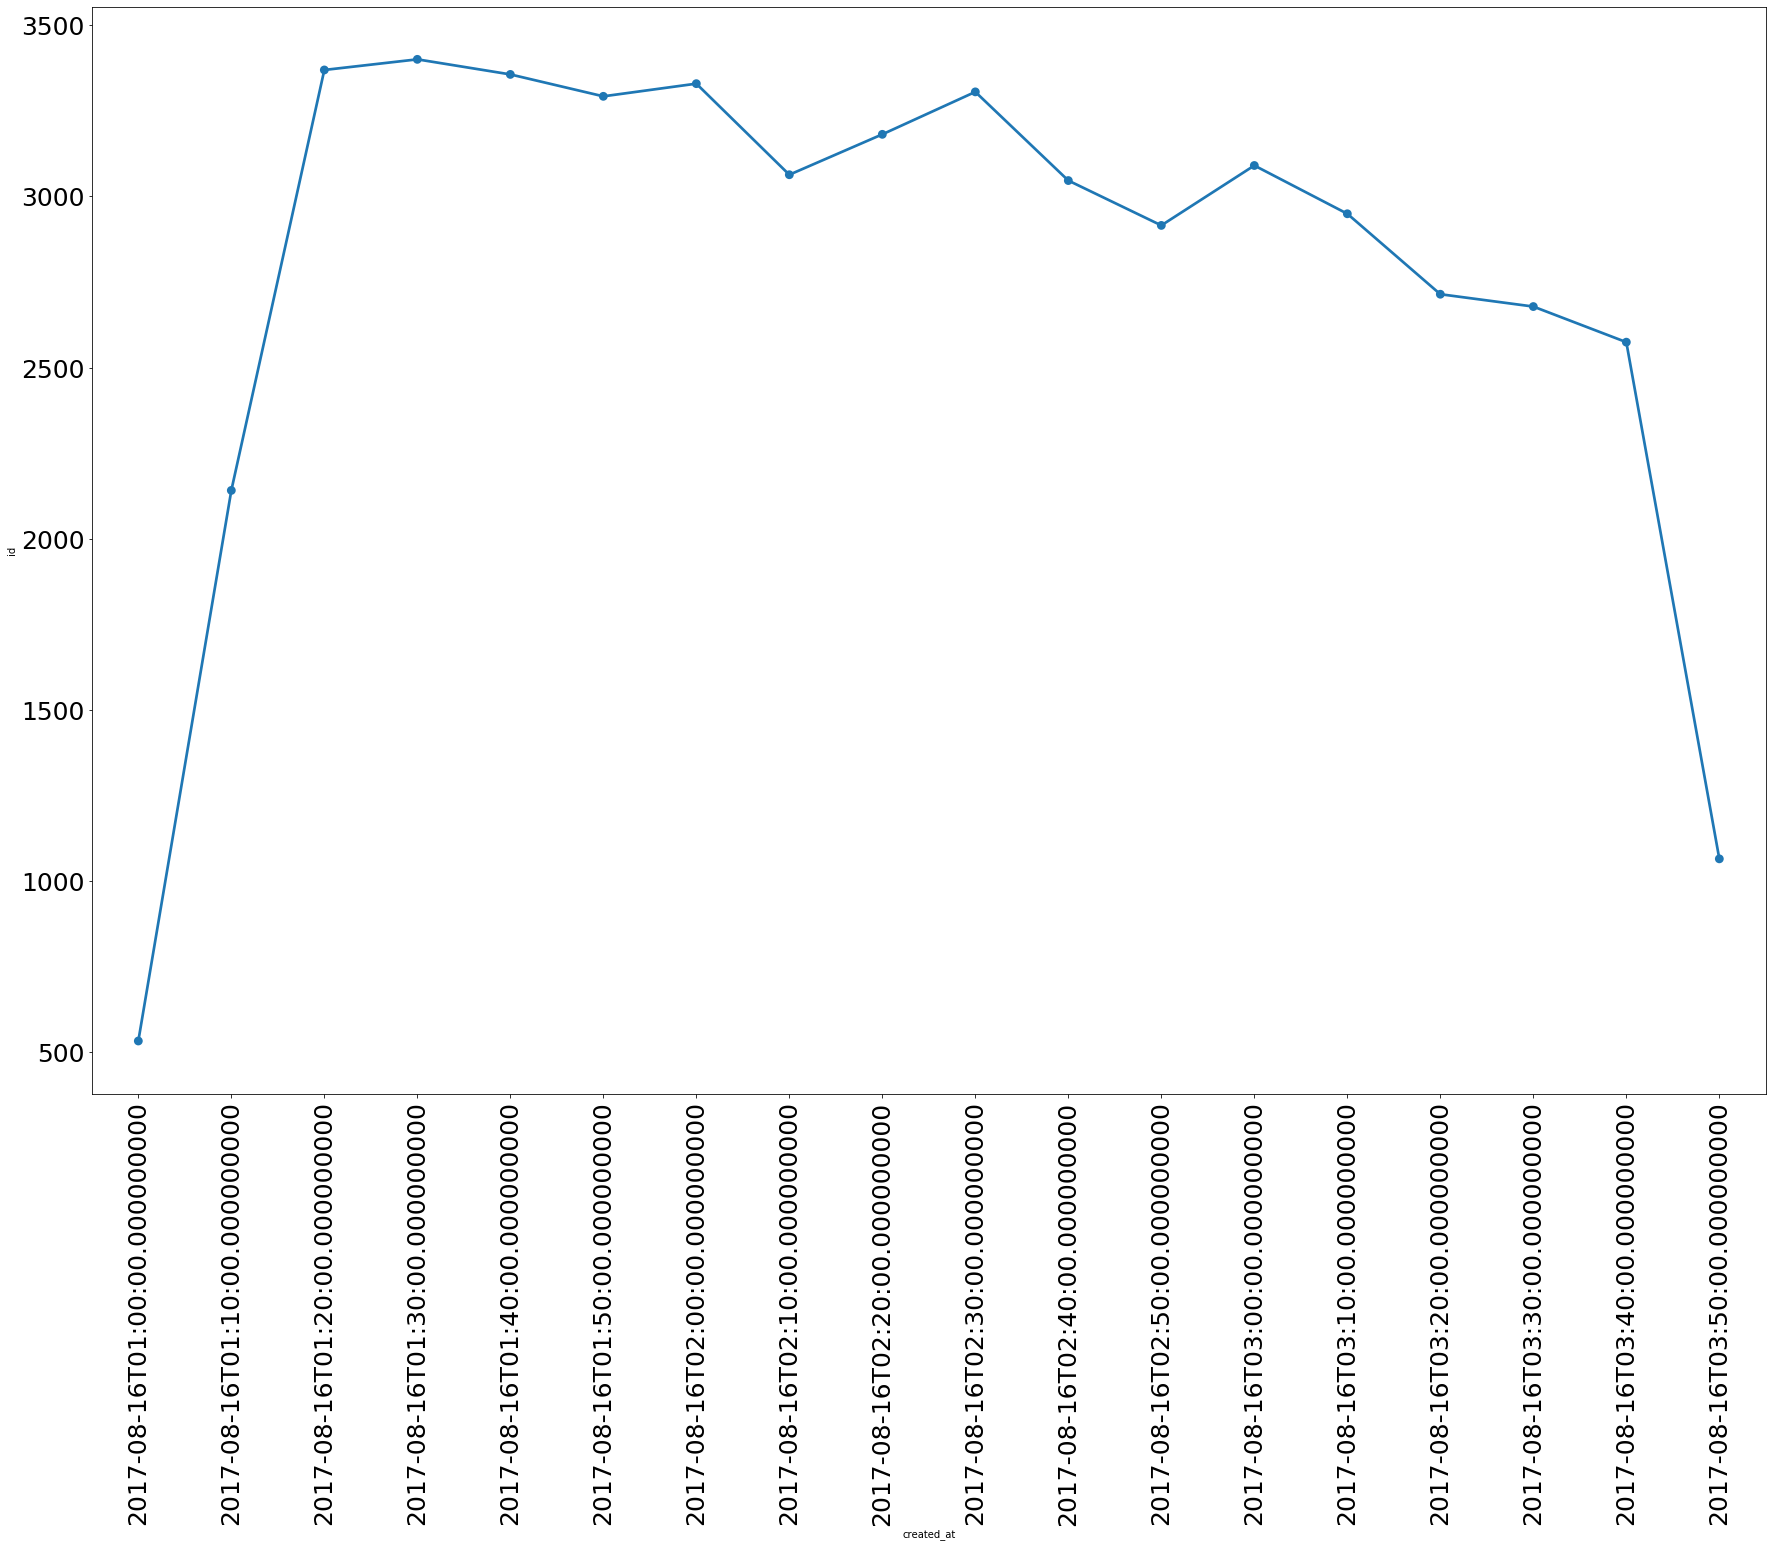

In [14]:
ax = sns.pointplot(x=tweet_volume.index, y='id', data=tweet_volume)
ax.tick_params(labelsize=25)
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [35]:
influential_tweets = tweets[['user_name', 'followers_count']]
# influential_tweets = influential_tweets.sort_values('followers_count')
influential_tweets = influential_tweets.groupby('user_name').first().sort_values('followers_count', ascending=False)[:10]
influential_tweets

,followers_count
user_name,
CNN,37066668
Reuters Top News,18494616
Fox News,15636365
TIME,14518616
ABC News,11495209
Washington Post,10906940
HuffPost,10605780
Mashable,9205958
People,7817745
